# In-vivo evidence for increased tau deposition in temporal lobe epilepsy

### Content
1. Participants
1.  *Figure 3:* Relationship to clinical and cognitive variables

# **Figure 3:** Relationship to clinical and cognitive variables


In [1]:
# Libraries
import numpy as np
import pandas as pd

# Load utilities functions from utils.py
from utils import *

### Fetch data

In [2]:
# Load the data frame
osf_df = osf_download("18F-MK6240_in-vivo_database.csv", project_id='ct3gw')
df = pd.read_csv(osf_df)

# Load processed 18F-MK6240 PET data | matrix:{vertices x subjects}
osf_pet_raw = osf_download("surf-fsLR-32k_desc-GroupData_smooth-10mm_pvc-probGM_ref-cerebellarGM_trc-18Fmk6240_pet.npy", project_id='ct3gw')
pet_raw = np.load(osf_pet_raw)

Found file: 18F-MK6240_in-vivo_database.csv


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12.3k/12.3k [00:00<00:00, 7.09Mbytes/s]


Downloaded 18F-MK6240_in-vivo_database.csv to /var/folders/yv/7rdtqnkn0mb58f5x_yprm2gw0000gn/T/tmpp8t345lu/18F-MK6240_in-vivo_database.csv
Found file: surf-fsLR-32k_desc-GroupData_smooth-10mm_pvc-probGM_ref-cerebellarGM_trc-18Fmk6240_pet.npy


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28.6M/28.6M [00:06<00:00, 4.45Mbytes/s]


Downloaded surf-fsLR-32k_desc-GroupData_smooth-10mm_pvc-probGM_ref-cerebellarGM_trc-18Fmk6240_pet.npy to /var/folders/yv/7rdtqnkn0mb58f5x_yprm2gw0000gn/T/tmphufnpjpl/surf-fsLR-32k_desc-GroupData_smooth-10mm_pvc-probGM_ref-cerebellarGM_trc-18Fmk6240_pet.npy


### Sort the matrices into ipsilateral/contralateral relative to seizure focus

In [3]:
# fsLR-32k length
n_64k = pet_raw.shape[1]
n_32k = int(n_64k/2)

# Flip R >> L 18F-mk6240
mk_ipsi, mk_contra = flip_mat(pet_raw[:,0:n_32k], pet_raw[:,n_32k:n_64k], df['lateralization'].values, flip='R')

# Merge ipsi and contra
tauMK6240 = np.concatenate((mk_ipsi, mk_contra), axis=1)


Flipping data from Right to Left


-----------------

### A | Tau MK6240 SUVR and clinical relationships

### Effect of age

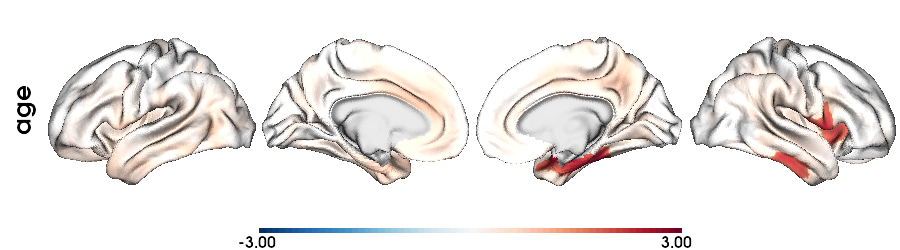

In [4]:
slm_surf(df, tauMK6240, feat='age', neg_tail=False, cthr=0.05, scale=1, nan_color=(0.8, 0.8, 0.8, 1))

### Effect of duration

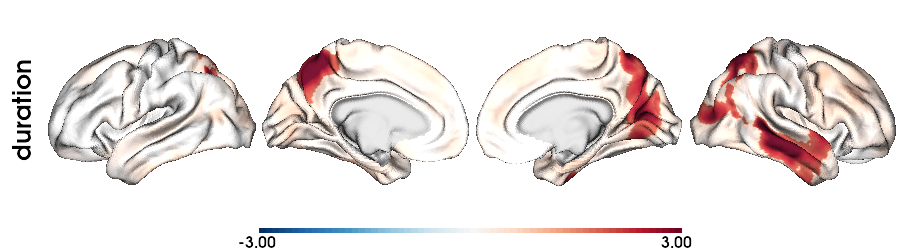

In [5]:
# Slice only Patients
idx = df['group'] == 'Patient'

slm_surf(df[idx], tauMK6240[idx,:], feat='duration', neg_tail=False, cthr=0.05, scale=1, nan_color=(0.8, 0.8, 0.8, 1))

### B | Tau MK6240 SUVR and behavioral relationships

### Epitrack score

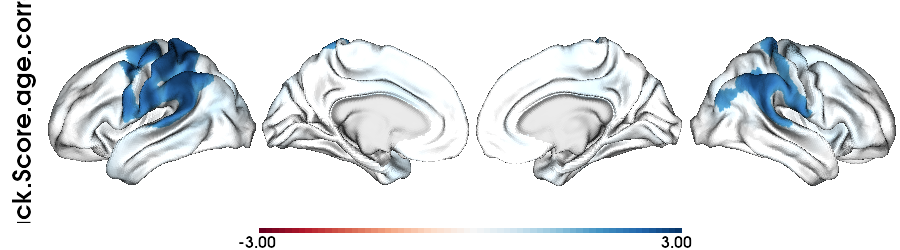

In [6]:
slm_surf(df, feat='EpiTrack.Score.age.corrected', Y=tauMK6240, neg_tail=True, cthr=0.05, scale=1, nan_color=(0.8, 0.8, 0.8, 1))

### Episodic memory

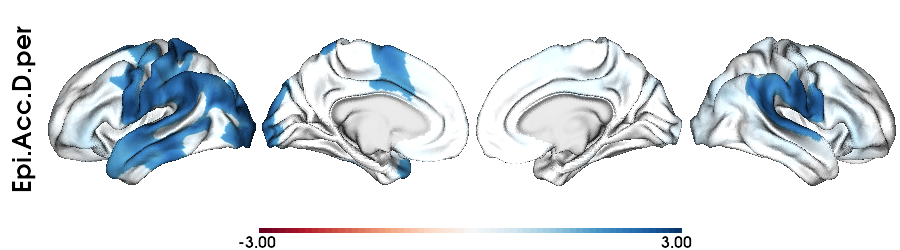

In [7]:
slm_surf(df, feat='Epi.Acc.D.per', Y=tauMK6240, neg_tail=True, cthr=0.05, scale=1, nan_color=(0.8, 0.8, 0.8, 1))

### Semantic memory

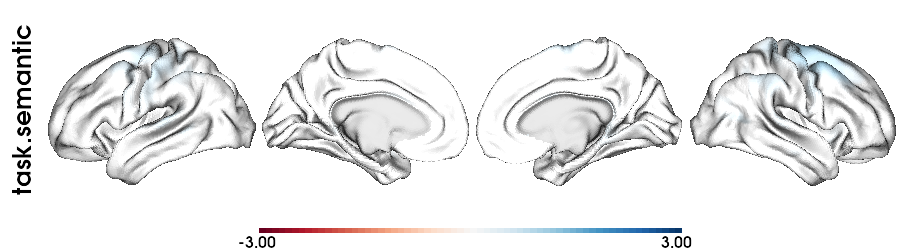

In [8]:
slm_surf(df, feat='task.semantic', Y=tauMK6240, neg_tail=True, cthr=0.05, alpha=0.5, scale=1, nan_color=(0.8, 0.8, 0.8, 1))

### Effect of duration controlled for age

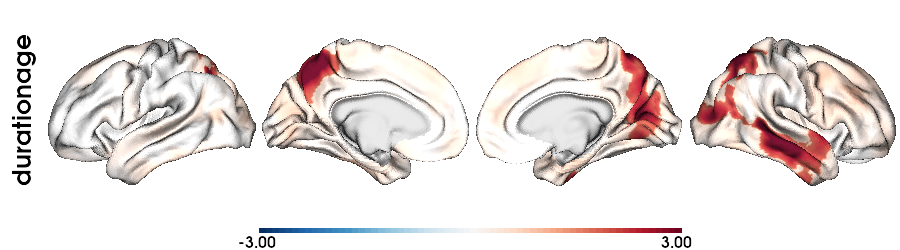

In [9]:
from sklearn.linear_model import LinearRegression

# Create linear regression object
mod = LinearRegression()

# Fit the data to the model
slm = mod.fit(df.loc[idx, ['age']], df.loc[idx, 'duration'])  # Ensure age is 2D

# Generate the predicted values
predic = mod.predict(df.loc[idx, ['age']])  # Use mod.predict(), not slm

# Compute residuals using .loc[] to avoid SettingWithCopyWarning
df.loc[idx, 'durationage'] = df.loc[idx, 'duration'] - predic

# Apply slm_surf function
slm_surf(df[idx], tauMK6240[idx, :], feat='durationage', neg_tail=False, cthr=0.05, scale=1, nan_color=(0.8, 0.8, 0.8, 1))